<a href="https://colab.research.google.com/github/snowfiap/Datascience-Internship/blob/main/SMS_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SMS Classifier**

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

###Load dataset

In [23]:
df=pd.read_csv('/content/archive.zip')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


##**Data Preparation**


####Data Seperation as X and Y

In [5]:
X=df['text'].astype(str)
y=df['spam'].replace({0:"Not Spam",1:"Spam"}).astype("object")

In [29]:
y.head() #printing y value alone

0    Spam
1    Spam
2    Spam
3    Spam
4    Spam
Name: spam, dtype: object

####Data Splittting for Training and Testing

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25) #Ratio of training and testing set is 80:20

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(stop_words='english')
X_train_v=vect.fit_transform(X_train)
X_test_v=vect.transform(X_test)

In [9]:
X_array=X_train_v.toarray()
X_array

array([[0.04437521, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [10]:
y_train

1910    Not Spam
825         Spam
2838    Not Spam
1642    Not Spam
1287        Spam
          ...   
459         Spam
1503    Not Spam
2497    Not Spam
5099    Not Spam
2688    Not Spam
Name: spam, Length: 4296, dtype: object

In [31]:
df_arr=pd.DataFrame(X_array,columns=vect.get_feature_names_out())
df_arr.head()

,00,000,0000,000000,00000000,0000000000,000000000003619,000000000003997,000000000005168,000000000005409,...,zwabic,zwischen,zwlaszcza,zwzm,zyc,zygoma,zymg,zzmacmac,zzn,zzzz
0,0.044375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_arr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Columns: 31565 entries, 00 to zzzz
dtypes: float64(31565)
memory usage: 1.0 GB


##**Model Building**

##Training the model

###Logistic Regression

0.9832402234636871
              precision    recall  f1-score   support

    Not Spam       0.98      1.00      0.99      1101
        Spam       0.99      0.93      0.96       331

    accuracy                           0.98      1432
   macro avg       0.99      0.97      0.98      1432
weighted avg       0.98      0.98      0.98      1432



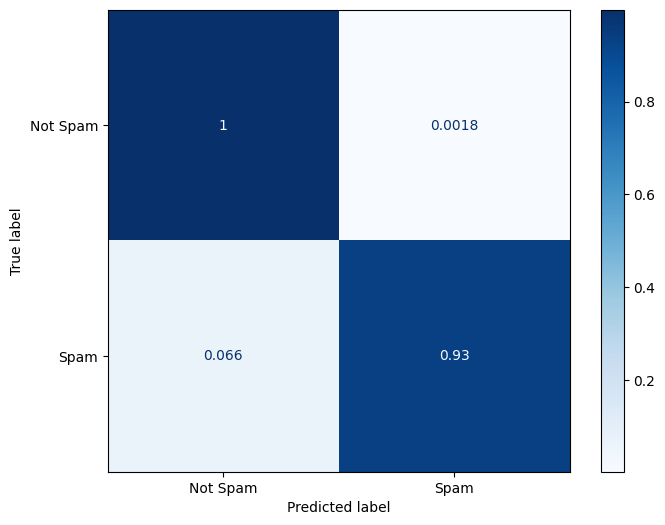

In [13]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_v,y_train)

prediction=lr.predict(X_test_v)

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(prediction,y_test)
print(accuracy)

target_names=['Not Spam','Spam']
print(classification_report(y_test,prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

####Testing the trained model

In [32]:
test=['Hi,my name is Snowfia and I am sending this image to  you.']
test_1=vect.transform(test)

In [33]:
test_1_P=lr.predict(test_1)
test_1_P

array(['Not Spam'], dtype=object)

###GaussianNB

0.9574022346368715
              precision    recall  f1-score   support

    Not Spam       0.96      0.99      0.97      1101
        Spam       0.96      0.85      0.90       331

    accuracy                           0.96      1432
   macro avg       0.96      0.92      0.94      1432
weighted avg       0.96      0.96      0.96      1432



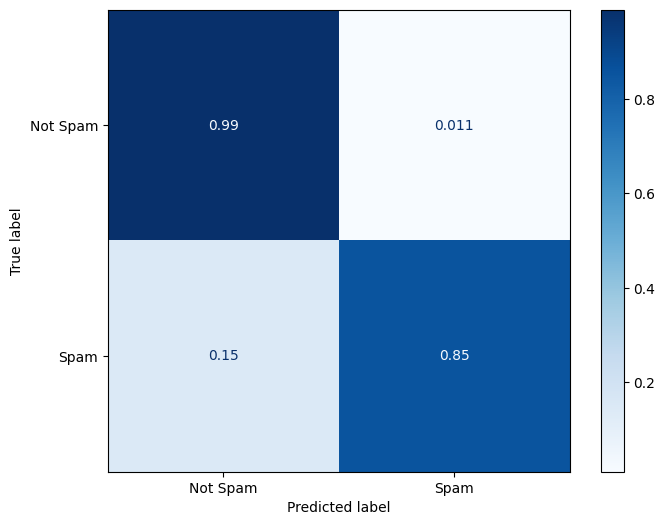

In [16]:
from sklearn.naive_bayes import GaussianNB
Gnb=GaussianNB()
Gnb.fit(X_train_v.toarray(),y_train)

prediction=Gnb.predict(X_test_v.toarray())

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(prediction,y_test)
print(accuracy)

target_names=['Not Spam','Spam']
print(classification_report(y_test,prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

###MultinomialNB

0.909217877094972
              precision    recall  f1-score   support

    Not Spam       0.89      1.00      0.94      1101
        Spam       1.00      0.61      0.76       331

    accuracy                           0.91      1432
   macro avg       0.95      0.80      0.85      1432
weighted avg       0.92      0.91      0.90      1432



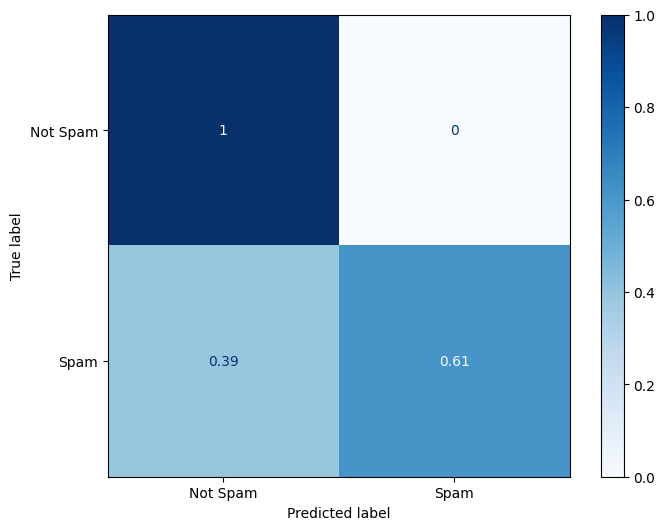

In [17]:
from sklearn.naive_bayes import MultinomialNB
Mnb=MultinomialNB()
Mnb.fit(X_train_v.toarray(),y_train)

prediction=Mnb.predict(X_test_v.toarray())

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(prediction,y_test)
print(accuracy)

target_names=['Not Spam','Spam']
print(classification_report(y_test,prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

###BernoulliNB

0.9881284916201117
              precision    recall  f1-score   support

    Not Spam       0.99      1.00      0.99      1101
        Spam       1.00      0.95      0.97       331

    accuracy                           0.99      1432
   macro avg       0.99      0.98      0.98      1432
weighted avg       0.99      0.99      0.99      1432



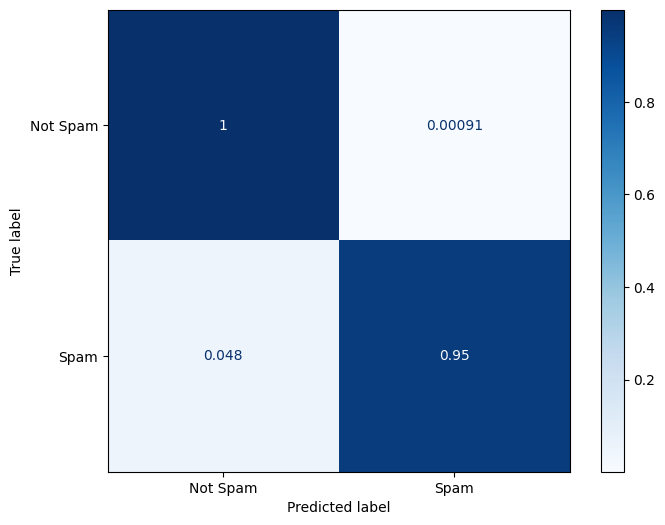

In [18]:
from sklearn.naive_bayes import BernoulliNB
Bnb=BernoulliNB()
Bnb.fit(X_train_v.toarray(),y_train)

prediction=Bnb.predict(X_test_v.toarray())

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(prediction,y_test)
print(accuracy)

target_names=['Not Spam','Spam']
print(classification_report(y_test,prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

###Decision Tree Classifier

0.9581005586592178
              precision    recall  f1-score   support

    Not Spam       0.97      0.98      0.97      1101
        Spam       0.93      0.88      0.91       331

    accuracy                           0.96      1432
   macro avg       0.95      0.93      0.94      1432
weighted avg       0.96      0.96      0.96      1432



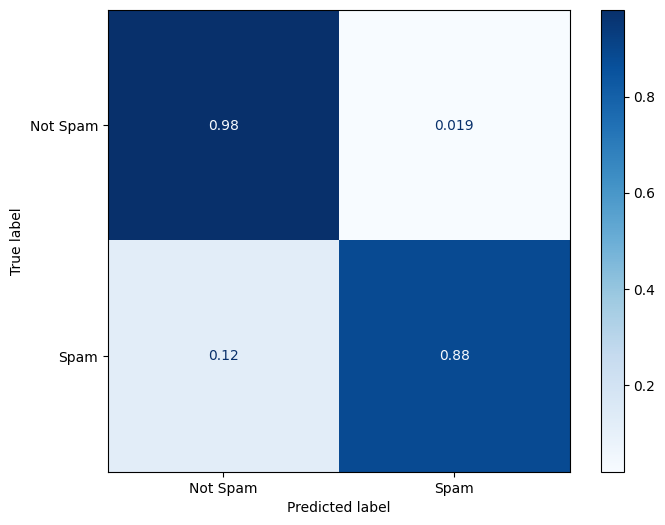

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',splitter='best',)
dt.fit(X_train_v,y_train)

prediction=dt.predict(X_test_v)

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(prediction,y_test)
print(accuracy)

target_names=['Not Spam','Spam']
print(classification_report(y_test,prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

###Random forest Classifier

0.9608938547486033
              precision    recall  f1-score   support

    Not Spam       0.95      1.00      0.98      1101
        Spam       1.00      0.83      0.91       331

    accuracy                           0.96      1432
   macro avg       0.98      0.92      0.94      1432
weighted avg       0.96      0.96      0.96      1432



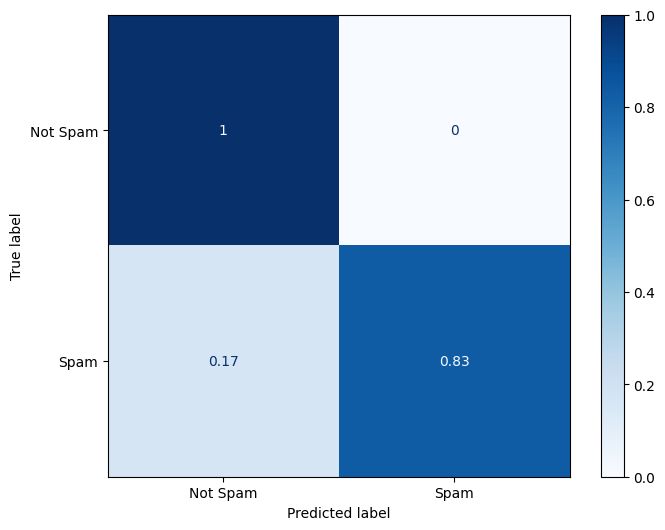

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,criterion='log_loss',max_features='log2',)
rf.fit(X_train_v,y_train)

prediction=rf.predict(X_test_v)

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(prediction,y_test)
print(accuracy)

target_names=['Not Spam','Spam']
print(classification_report(y_test,prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

###Support Vector Classification(SVC)

0.9937150837988827
              precision    recall  f1-score   support

    Not Spam       1.00      1.00      1.00      1101
        Spam       0.99      0.98      0.99       331

    accuracy                           0.99      1432
   macro avg       0.99      0.99      0.99      1432
weighted avg       0.99      0.99      0.99      1432



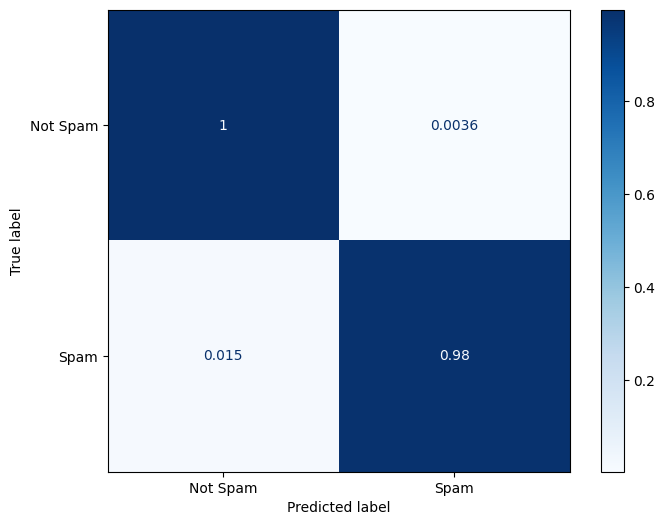

In [21]:
from sklearn.svm import SVC
svc=SVC(kernel='sigmoid')
svc.fit(X_train_v,y_train)
prediction=svc.predict(X_test_v)

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(prediction,y_test)
print(accuracy)

target_names=['Not Spam','Spam']
print(classification_report(y_test,prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

###Testing the model


In [35]:
test2=['Hi it is Ratan Tata here and I am giving you a laptop for free to all students in India']
test_2=vect.transform(test2)
test_2_P=svc.predict(test_2)
test_2_P

array(['Spam'], dtype=object)

In [34]:
test3=['Hi I am employee from Apple you won a free Iphone,send me a reply message with your address details to receive the Iphone ']
test_3=vect.transform(test3)
test_3_P=svc.predict(test_3)
test_3_P

array(['Spam'], dtype=object)

In [36]:
test4=['Hi it is Micheal from Chennai Please contact me if you have any queries about our Company']
test_4=vect.transform(test4)
test_4_P=svc.predict(test_4)
test_4_P

array(['Not Spam'], dtype=object)